In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from utils.load_dataframe import load_dataframe

In [10]:
reviews = load_dataframe("order_reviews")
customers = load_dataframe("customer")
orders = load_dataframe("orders")

In [ ]:
# Quantidade de avaliações (reviews) texto
reviews_no_text = reviews[reviews['review_comment_message'] == 'Sem comentário']

reviews_count_no_text = len(reviews_no_text)
display(f'Total de avaliações sem comentários: {reviews_count_no_text}')

'Total de avaliações sem comentários: 58247'

In [28]:
full_joins = (
    orders
        .merge(customers, how='left', on='customer_id')
        .merge(reviews, how='left',on='order_id')
)

# DataFrame somente de clientes que não comentaram
no_texts = full_joins[full_joins['review_comment_message'] == 'Sem comentário']

# Mostra a tendencia mesmo sem comentário, a nota de para o pedido
trend_review_no_comments = (
    no_texts
        .groupby('review_score')['customer_id']
        .count()
        .reset_index()
        .rename(columns={'customer_id': 'quantity'})
)
trend_review_no_comments

,review_score,quantity
0,1.0,2679
1,2.0,1006
2,3.0,4622
3,4.0,13166
4,5.0,36774


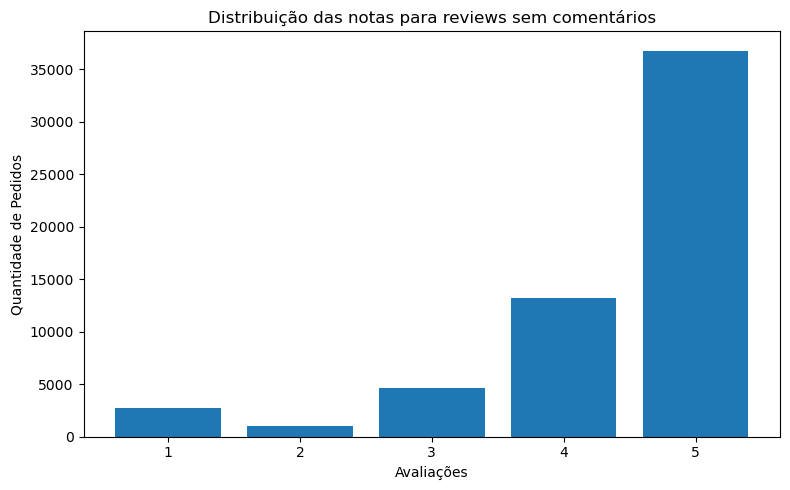

In [ ]:
# Gerando gráfico para a visualização das avaliações sem comentários

scores = trend_review_no_comments['review_score']
quantities = trend_review_no_comments['quantity']


plt.figure(figsize=(8, 5))
plt.bar(scores, quantities)

plt.title("Distribuição das notas para reviews sem comentários")
plt.xlabel("Avaliações")
plt.ylabel("Quantidade de Pedidos")
plt.xticks(scores)
plt.tight_layout()

plt.show()
